En este caso, vamos a utilizar un algoritmo de clasificación de Bosque Aleatorio (Random Forest) en Python para predecir la supervivencia en el Titanic. También utilizaremos la biblioteca scikit-learn:

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
# Cargar datos
titanic_data = pd.read_csv("./data/Titanic.csv")

In [16]:
# Preprocesamiento de datos
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna('S', inplace=True)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'])

In [17]:
# Separar en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    titanic_data.drop('Survived', axis=1), titanic_data['Survived'], test_size=0.2, random_state=42)

In [18]:
# Crear modelo de Bosque Aleatorio
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [19]:
# Entrenar modelo
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [20]:
# Predecir en datos de prueba
y_pred = clf.predict(X_test)

In [21]:
# Evaluar modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión: {:.2f}%".format(accuracy * 100))

Precisión: 78.32%


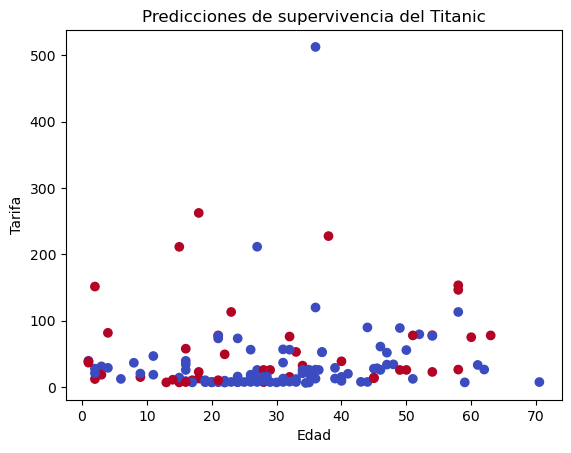

In [23]:
# Graficar las predicciones
plt.scatter(X_test['Age'], X_test['Fare'], c=y_pred, cmap='coolwarm')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Predicciones de supervivencia del Titanic')
plt.show()

Al igual que en el ejemplo anterior, primero cargamos y preprocesamos los datos del Titanic. Luego, dividimos los datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split. Después, creamos un modelo de Bosque Aleatorio utilizando la clase RandomForestClassifier con 100 árboles y una profundidad máxima de 5 niveles. Entrenamos el modelo con los datos de entrenamiento y hacemos predicciones en los datos de prueba utilizando el método predict. Finalmente, evaluamos la precisión del modelo utilizando la función accuracy_score.